In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

try:
    df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

Dataset loaded successfully!

--- First 5 rows of the dataset ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

In [2]:
print("\n--- Missing values before cleaning ---")
print(df.isnull().sum())

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"\nMissing 'Age' values filled with median: {median_age}")

df.drop('Cabin', axis=1, inplace=True)
print("The 'Cabin' column has been dropped.")

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing 'Embarked' values filled with mode: {mode_embarked}")

print("\n--- Missing values after cleaning ---")
print(df.isnull().sum())
print("\nData cleaning complete.")

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("\n'FamilySize' feature created.")

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
print("'IsAlone' feature created.")

df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['IsAlone'] = df['IsAlone'].astype('category')
print("\nData types of 'Survived', 'Pclass', and 'IsAlone' converted to 'category'.")

print("\n--- Cleaned and Processed Dataset Info ---")
df.info()
print("\n")


--- Missing values before cleaning ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing 'Age' values filled with median: 28.0
The 'Cabin' column has been dropped.
Missing 'Embarked' values filled with mode: S

--- Missing values after cleaning ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data cleaning complete.

'FamilySize' feature created.
'IsAlone' feature created.

Data types of 'Survived', 'Pclass', and 'IsAlone' converted to 'category'.

--- Cleaned and Processed Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   

/tmp/ipython-input-916251609.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-916251609.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

--- Distribution of Survived ---
Survived
0    549
1    342
Name: count, dtype: int64


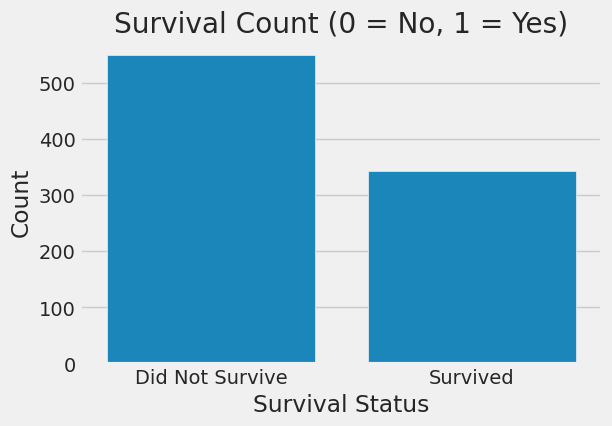


--- Survival Rate by Passenger Class ---
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


/tmp/ipython-input-2233338954.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()


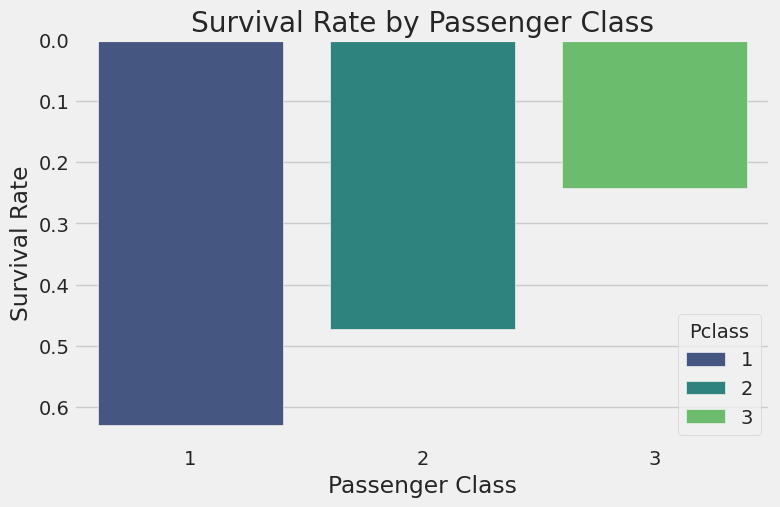


--- Survival Rate by Gender ---
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


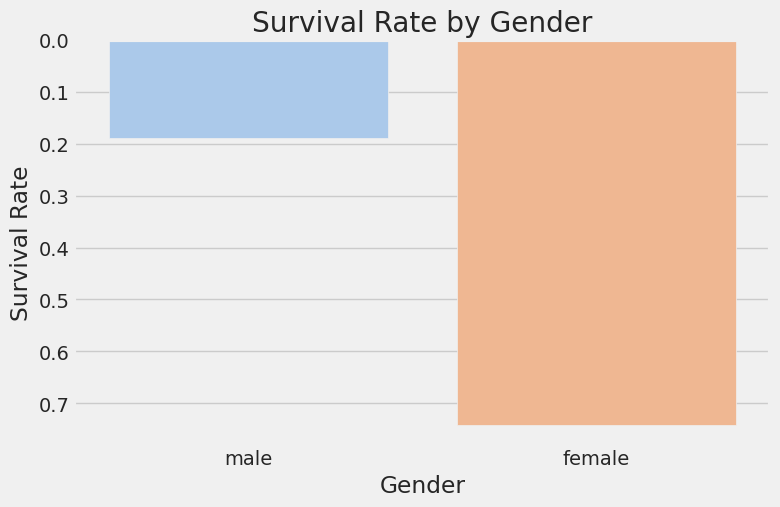


--- Age Distribution with respect to Survival ---


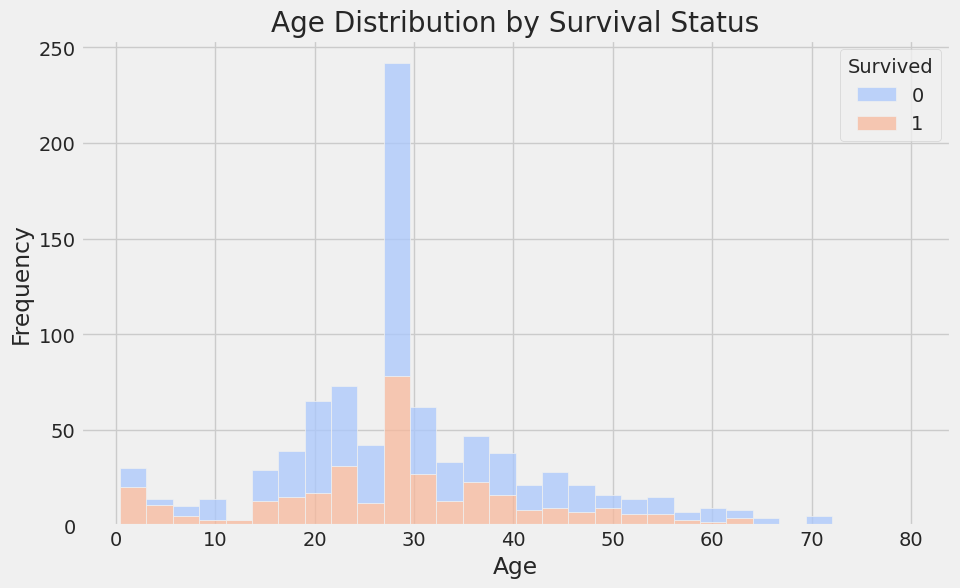


--- Survival Rate by Embarkation Port ---
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


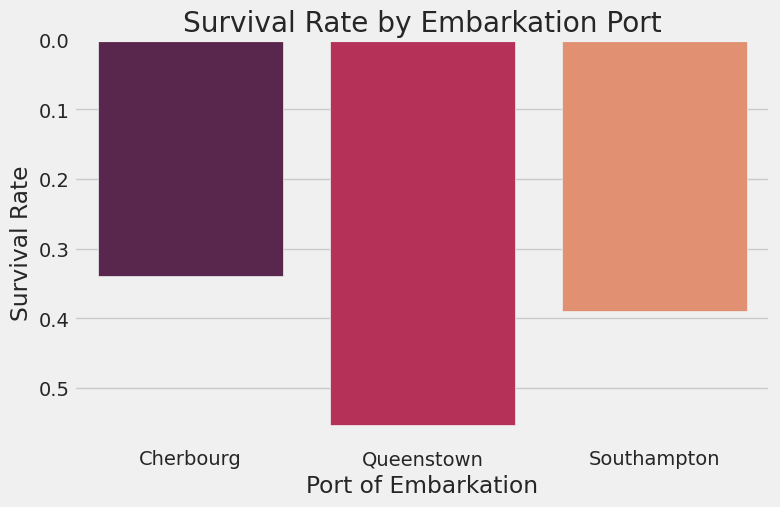


--- Fare Distribution with respect to Survival ---


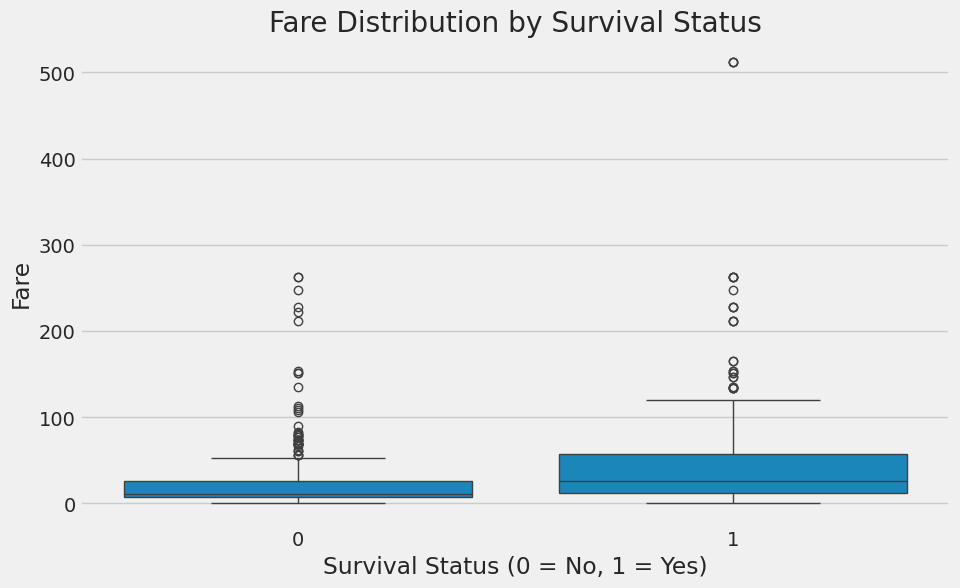


--- Survival Rate by Family Size ---
Survived           0         1
FamilySize                    
1           0.696462  0.303538
2           0.447205  0.552795
3           0.421569  0.578431
4           0.275862  0.724138
5           0.800000  0.200000
6           0.863636  0.136364
7           0.666667  0.333333
8           1.000000  0.000000
11          1.000000  0.000000


/tmp/ipython-input-2233338954.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None, palette='cividis')


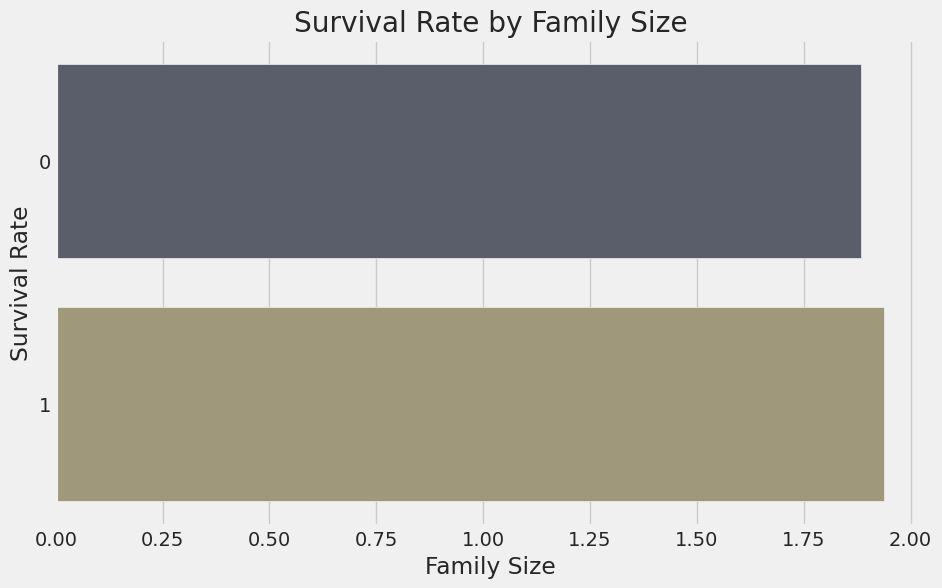


--- Correlation Matrix ---
            Survived       Age      Fare  FamilySize
Survived    1.000000 -0.064910  0.257307    0.016639
Age        -0.064910  1.000000  0.096688   -0.245619
Fare        0.257307  0.096688  1.000000    0.217138
FamilySize  0.016639 -0.245619  0.217138    1.000000


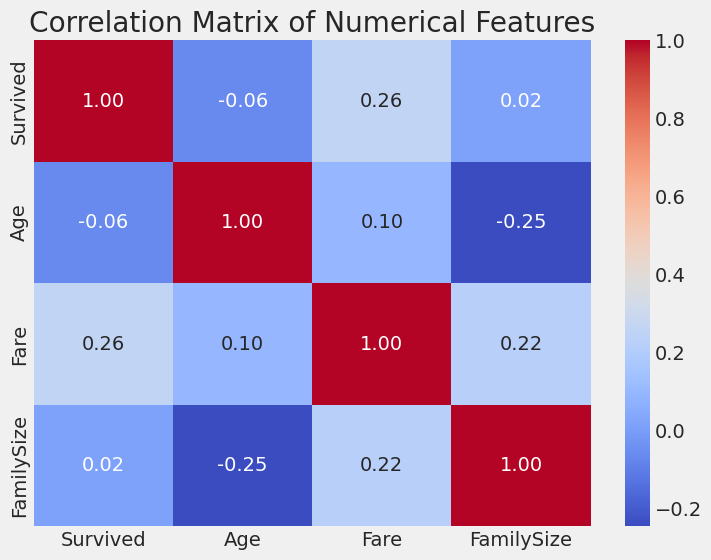

In [3]:
print("--- Distribution of Survived ---")
survival_counts = df['Survived'].value_counts()
print(survival_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
plt.show()

print("\n--- Survival Rate by Passenger Class ---")
class_survival = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
print(class_survival)

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, hue='Pclass', errorbar=None, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

print("\n--- Survival Rate by Gender ---")
gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
print(gender_survival)

plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df, hue='Sex', errorbar=None, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

print("\n--- Age Distribution with respect to Survival ---")
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, multiple='stack', bins=30, palette='coolwarm')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("\n--- Survival Rate by Embarkation Port ---")
embarked_survival = df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()
print(embarked_survival)

plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df, hue='Embarked', errorbar=None, palette='rocket')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

print("\n--- Fare Distribution with respect to Survival ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

print("\n--- Survival Rate by Family Size ---")
familysize_survival = df.groupby('FamilySize')['Survived'].value_counts(normalize=True).unstack()
print(familysize_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None, palette='cividis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

df_corr = df.copy()
df_corr['Survived'] = df_corr['Survived'].astype('int')
numerical_cols = ['Survived', 'Age', 'Fare', 'FamilySize']
corr_matrix = df_corr[numerical_cols].corr()

print("\n--- Correlation Matrix ---")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()